In [2]:
import os
import subprocess
import pandas as pd
import shutil
import matplotlib.pyplot as plt

os.makedirs('exploration/benign', exist_ok=True)
os.makedirs('exploration/malicious', exist_ok=True)

malware_df = pd.read_csv('data/DikeDataset/labels/malware.csv')
malware_df['benign_or_malware'] = 'malware'

benign_df = pd.read_csv('data/DikeDataset/labels/benign.csv')
benign_df['benign_or_malware'] = 'benign'
benign_df = benign_df.astype(malware_df.dtypes.to_dict())

benign_df.dtypes

labels = pd.concat([benign_df, malware_df]).reset_index(drop=True)

In [86]:
# for name in labels.loc[benign_df.shape[0]:benign_df.shape[0]*2]['hash']:
#     shutil.copyfile(f'data/DikeDataset/files/malware/{name}.exe', f'deepreflect/data/malicious_unpacked/malware/{name}.exe')
    

In [87]:
# # ensure that there's an equal number of benign & malicious examples
# for i in range(benign_df.shape[0], benign_df.shape[0]*2):
#     prefix = 'data/DikeDataset/files/'
#     filepath = f'{labels.iat[i, 12]}/{labels.iat[i, 1]}'
#     postfix = '.exe'

#     subprocess.run(['python', 'main.py', '-o', f'exploration/{filepath}', prefix + filepath + postfix])

In [3]:
import pandas as pd
import seaborn as sns

# df = pd.read_csv('runs/malwaredetection_2024-04-30 11:01:59.292519.txt')

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# cm = confusion_matrix(df['truth'].tolist(), df['pred'].tolist(), labels=['benign', 'malware'])
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['benign', 'malware'])
# disp.plot()
# plt.title('Confusion Matrix for "malware-dection"')
# # sns.heatmap(cm, fmt='d', annot=True, square=True,
#             cmap='gray_r', vmin=0, vmax=0,  # set all to white
#             linewidths=0.5, linecolor='k',  # draw black grid lines
#             cbar=False)                     # disable colorbar

# # re-enable outer spines
# sns.despine(left=False, right=False, top=False, bottom=False)

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from classifier import label_2_encoding

def my_confusion_matrix(df):
    ''' assumes df has columns "true", "pred" that are both str of either {'malware', 'benign'} + "raw_pred" which is the raw output of selection '''

    true = df['true'].tolist()
    pred = df['pred'].tolist()
    cm = confusion_matrix(true, pred, labels=['malware', 'benign'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['malware', 'benign'])
    
    return cm, disp

def my_metrics(df):
    ''' assumes df has columns "true", "pred" that are both str of either {'malware', 'benign'} + "raw_pred" which is the raw output of selection '''
    
    true = df['true'].tolist()
    pred = df['pred'].tolist()
    
    accuracy = metrics.accuracy_score(true, pred)
    f1_score = metrics.f1_score(true, pred, pos_label='malware')
    
    tp, fn, fp, tn = my_confusion_matrix(df)[0].ravel()
    fnr = fn / (tp + fn)
    
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    
    return accuracy, f1_score, fnr, sensitivity, specificity
    
def my_auc_roc(df):
    ''' assumes df has columns "true", "pred" that are both str of either {'malware', 'benign'} + "raw_pred" which is the raw output of selection '''
    
    true = [label_2_encoding[e] for e in df['true'].tolist()]
    pred = df['pred'].tolist()
    pred_raw = df['raw_pred'].tolist()
    
    fpr, tpr, thresholds = metrics.roc_curve(true, pred_raw, pos_label=label_2_encoding['malware'])
    roc_auc = metrics.auc(fpr, tpr)
    return metrics.roc_auc_score(true, pred_raw), metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
 

df_results = pd.DataFrame({ 'accuracy': [], 'f1_score': [], 'fnr': [], 'auroc_score': [], 'sensitivity': [], 'specificity': [], 'type': [] })

for csv in os.listdir('runs'):
    df = pd.read_csv(f'runs/{csv}', index_col=0)

    cm, cm_plot = my_confusion_matrix(df)
    accuracy, f1_score, fnr, sensitivity, specificity = my_metrics(df)
    auroc_score, roc_plot = my_auc_roc(df)
    
    df_results.loc[len(df_results)] = [accuracy, f1_score, fnr, sensitivity, specificity, auroc_score, 'gnb' if 'gnb' in csv else 'malware-dection']

Text(0, 0.5, 'True Label')

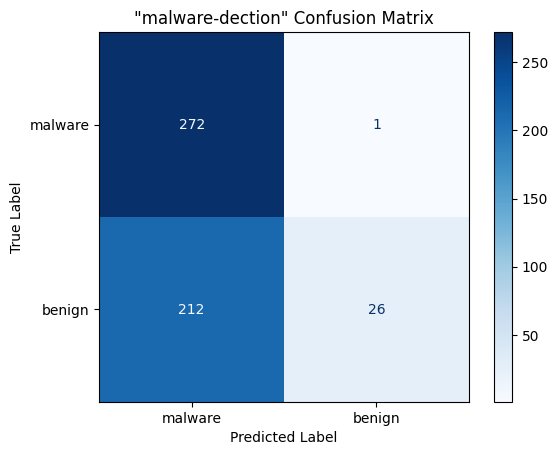

In [11]:
df = pd.read_csv('runs/malwaredetection_2024-05-01 01:17:32.408009.csv')
fig = my_confusion_matrix(df)[1]
fig.plot(cmap="Blues")
plt.title('"malware-dection" Confusion Matrix')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

0.9282945736434108

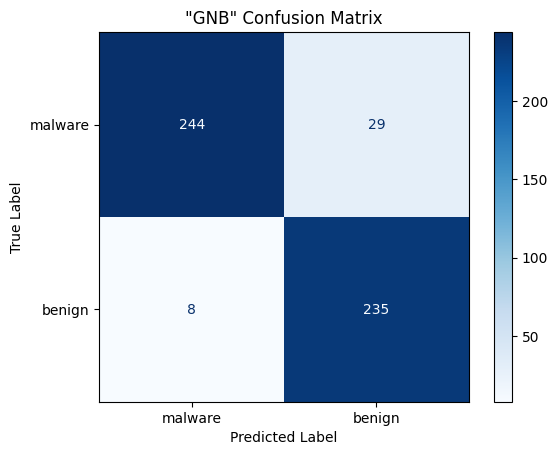

In [22]:
# df = pd.read_csv('runs/gnb_2024-05-01 00:46:06.077325.csv')
# df = pd.read_csv('runs/gnb_2024-05-01 00:53:01.762134.csv')
# df = pd.read_csv('runs/gnb_2024-05-01 00:56:58.859603.csv')
# df = pd.read_csv('runs/gnb_2024-05-01 01:00:54.570778.csv')
df = pd.read_csv('runs/gnb_2024-05-01 01:10:33.704503.csv')
fig = my_confusion_matrix(df)[1]
fig.plot(cmap="Blues")
plt.title('"GNB" Confusion Matrix')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
my_metrics(df)[0]

In [12]:
df_results
# df_results.groupby('type').agg(['mean', 'sem'])

,accuracy,f1_score,fnr,auroc_score,sensitivity,specificity,type
0,0.889535,0.899824,0.062271,0.937729,0.835391,0.965556,gnb
1,0.924419,0.925996,0.106227,0.893773,0.958848,0.968540,gnb
2,0.928295,0.929524,0.106227,0.893773,0.967078,0.976801,gnb
3,0.877907,0.872211,0.212454,0.787546,0.979424,0.972113,gnb
4,0.926357,0.926641,0.120879,0.879121,0.979424,0.976424,gnb
5,0.583170,0.718626,0.003663,0.996337,0.109244,0.674770,malware-dection
